<a href="https://colab.research.google.com/github/TmnGitHub/STOCK_LSTM/blob/main/STOCK_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
### Data Collection
import pandas_datareader as pdr

In [4]:

df = pdr.get_data_tiingo('ASTR', api_key=key)

In [6]:
df.to_csv('ASTR.csv')


In [7]:


df=pd.read_csv('ASTR.csv')

In [8]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,ASTR,2020-10-06 00:00:00+00:00,10.00,10.00,10.0,10.00,200000,10.00,10.00,10.0,10.00,200000,0.0,1.0
1,ASTR,2020-10-07 00:00:00+00:00,9.90,9.95,9.9,9.95,12302,9.90,9.95,9.9,9.95,12302,0.0,1.0
2,ASTR,2020-10-08 00:00:00+00:00,9.90,9.90,9.9,9.90,19802,9.90,9.90,9.9,9.90,19802,0.0,1.0
3,ASTR,2020-10-09 00:00:00+00:00,9.80,9.90,9.8,9.90,10800,9.80,9.90,9.8,9.90,10800,0.0,1.0
4,ASTR,2020-10-12 00:00:00+00:00,9.86,9.87,9.8,9.86,39699,9.86,9.87,9.8,9.86,39699,0.0,1.0


In [9]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
265,ASTR,2021-10-25 00:00:00+00:00,9.81,9.8700,9.41,9.43,3284787,9.81,9.8700,9.41,9.43,3284787,0.0,1.0
266,ASTR,2021-10-26 00:00:00+00:00,9.39,10.0486,9.32,10.01,5424987,9.39,10.0486,9.32,10.01,5424987,0.0,1.0
267,ASTR,2021-10-27 00:00:00+00:00,9.24,9.4300,8.83,9.16,4158652,9.24,9.4300,8.83,9.16,4158652,0.0,1.0
268,ASTR,2021-10-28 00:00:00+00:00,9.61,9.8200,9.17,9.17,2925769,9.61,9.8200,9.17,9.17,2925769,0.0,1.0
269,ASTR,2021-10-29 00:00:00+00:00,9.74,9.8700,9.52,9.53,1773247,9.74,9.8700,9.52,9.53,1773247,0.0,1.0


In [11]:
df1 = df.reset_index()['close']

In [12]:
df1

0      10.00
1       9.90
2       9.90
3       9.80
4       9.86
       ...  
265     9.81
266     9.39
267     9.24
268     9.61
269     9.74
Name: close, Length: 270, dtype: float64

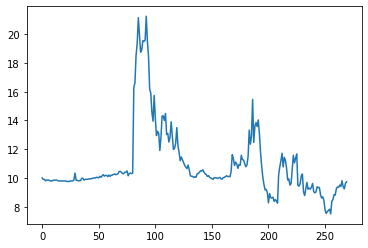

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.18181818],
       [0.17454545],
       [0.17454545],
       [0.16727273],
       [0.17163636],
       [0.17090909],
       [0.17090909],
       [0.16727273],
       [0.16727273],
       [0.16727273],
       [0.17090909],
       [0.17090909],
       [0.17090909],
       [0.17090909],
       [0.16727273],
       [0.16727273],
       [0.16654545],
       [0.16654545],
       [0.16654545],
       [0.16654545],
       [0.16654545],
       [0.16654545],
       [0.16363636],
       [0.16472   ],
       [0.16363636],
       [0.16690909],
       [0.16690909],
       [0.16690909],
       [0.17090909],
       [0.20654545],
       [0.17018182],
       [0.17018182],
       [0.16727273],
       [0.16872727],
       [0.16872727],
       [0.18036364],
       [0.18036364],
       [0.17090909],
       [0.17454545],
       [0.17527273],
       [0.17454545],
       [0.17672727],
       [0.17672727],
       [0.17818182],
       [0.17818182],
       [0.18181818],
       [0.18181818],
       [0.181

In [16]:

##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(175, 95)

In [20]:
train_data

array([[0.18181818],
       [0.17454545],
       [0.17454545],
       [0.16727273],
       [0.17163636],
       [0.17090909],
       [0.17090909],
       [0.16727273],
       [0.16727273],
       [0.16727273],
       [0.17090909],
       [0.17090909],
       [0.17090909],
       [0.17090909],
       [0.16727273],
       [0.16727273],
       [0.16654545],
       [0.16654545],
       [0.16654545],
       [0.16654545],
       [0.16654545],
       [0.16654545],
       [0.16363636],
       [0.16472   ],
       [0.16363636],
       [0.16690909],
       [0.16690909],
       [0.16690909],
       [0.17090909],
       [0.20654545],
       [0.17018182],
       [0.17018182],
       [0.16727273],
       [0.16872727],
       [0.16872727],
       [0.18036364],
       [0.18036364],
       [0.17090909],
       [0.17454545],
       [0.17527273],
       [0.17454545],
       [0.17672727],
       [0.17672727],
       [0.17818182],
       [0.17818182],
       [0.18181818],
       [0.18181818],
       [0.181

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [32]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [33]:
print(X_train.shape), print(y_train.shape)


(154, 20)
(154,)


(None, None)

In [34]:
print(X_test.shape), print(ytest.shape)

(74, 20)
(74,)


(None, None)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
3/3 [==============================] - 11s 608ms/step - loss: 0.1261 - val_loss: 0.0076
Epoch 2/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0536 - val_loss: 0.0182
Epoch 3/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0335 - val_loss: 0.0458
Epoch 4/100
3/3 [==============================] - 0s 32ms/step - loss: 0.0385 - val_loss: 0.0223
Epoch 5/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0284 - val_loss: 0.0111
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0293 - val_loss: 0.0090
Epoch 7/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0303 - val_loss: 0.0104
Epoch 8/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0277 - val_loss: 0.0156
Epoch 9/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0253 - val_loss: 0.0220
Epoch 10/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0262 - val_loss: 0.0244
Epoch 11/100
3/3 

In [41]:

import tensorflow as tf
tf.__version__

'2.6.0'

In [42]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [43]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [44]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11.480111339727728

In [45]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

9.395280295262554

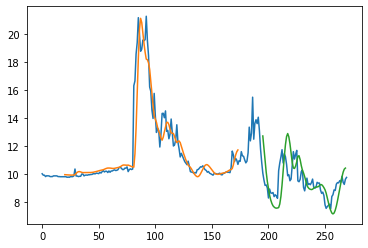

In [70]:
### Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


95

In [58]:
x_input=test_data[75:].reshape(1,-1)
x_input.shape

(1, 20)

In [59]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [60]:
temp_input

[0.02036363636363636,
 0.0021818181818181737,
 0.011636363636363667,
 0.0174545454545455,
 0.02400000000000002,
 0.0,
 0.06400000000000006,
 0.07272727272727275,
 0.09818181818181815,
 0.09527272727272729,
 0.128,
 0.1359999999999999,
 0.13454545454545452,
 0.1461818181818182,
 0.13890909090909098,
 0.16800000000000004,
 0.1374545454545455,
 0.12654545454545452,
 0.1534545454545454,
 0.1629090909090909]

In [81]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<250):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.34161428 0.3416436  0.34167075 0.34169579 0.34171835 0.34173858
 0.34175631 0.34177154 0.34178418 0.34179431 0.34180191 0.3418071
 0.34180993 0.34181026 0.34180853 0.34180462 0.34179863 0.3417908
 0.34178114 0.34176993]
0 day output [[0.34175727]]
1 day input [0.3416436  0.34167075 0.34169579 0.34171835 0.34173858 0.34175631
 0.34177154 0.34178418 0.34179431 0.34180191 0.3418071  0.34180993
 0.34181026 0.34180853 0.34180462 0.34179863 0.3417908  0.34178114
 0.34176993 0.34175727]
1 day output [[0.34174332]]
2 day input [0.34167075 0.34169579 0.34171835 0.34173858 0.34175631 0.34177154
 0.34178418 0.34179431 0.34180191 0.3418071  0.34180993 0.34181026
 0.34180853 0.34180462 0.34179863 0.3417908  0.34178114 0.34176993
 0.34175727 0.34174332]
2 day output [[0.34172824]]
3 day input [0.34169579 0.34171835 0.34173858 0.34175631 0.34177154 0.34178418
 0.34179431 0.34180191 0.3418071  0.34180993 0.34181026 0.34180853
 0.34180462 0.34179863 0.3417908  0.34178114 0.34176993 0.341

In [86]:
test_predict2=scaler.inverse_transform(lst_output)

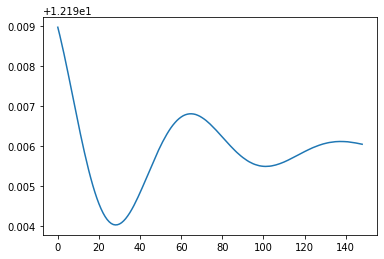

In [88]:
import matplotlib.pyplot as plt
plt.plot(test_predict2[1:150])